Deguidi Matteo, 2092322

## Homework III Exercise I

Binet's problem states that the equation of motion of a body under a force $f(r)$
    $\begin{equation}
    \ddot{\vec{r}}+f(r)\hat{\vec{r}}=\vec{0}
    \end{equation}$

can be rewritten as
    $\begin{equation}
    \dfrac{\text{d}^2u}{\text{d}\theta^2}+u=\dfrac{1}{h^2u^2}f\left(\dfrac{1}{u}\right)
    \end{equation}$

where $u=r^{-1}$, $\theta$ is the anomaly and $h$ is the constant of areas.


In the case of a sinusoidal perturbation we found that the force can be represented as:
    $\begin{align}
    f(r)&=\dfrac{A}{r^3}+\dfrac{B}{r^4}+\dfrac{C}{r^5}\\
    f\left(\dfrac{1}{u}\right)&=Au^3+Bu^4+Cu^5
    \end{align}$
where
    $\begin{align}
    A&=h^2(1-k^2)\\
    B&=3h^2k^2R\\
    C&=2h^2k^2(a^2-R^2)
    \end{align}$

Importing of the packages that are needed

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

Definition of parameters

In [2]:
R=1.0       ## Average radius of the orbit
a=0.25*R    ## Amplitude of the perturbation
k=5.0       ## Pulsation of the perturbation (k=2*pi/T)
phi=0.      ## Phase of the perturbation

Definition of the system of equation used:
    $\begin{equation}
    \begin{cases}
    u=x[0]\\
    \dfrac{\text{d}u}{\text{d}\theta}=x[1]
    \end{cases}
    \end{equation}$

In [3]:
def derivatives(x, t):
    return [x[1], x[0]*k**2*(-1.+3.*R*x[0]+2.*(a**2-R**2)*x[0]**2)]

Solving the equation using $\texttt{scipy.integrate.odeint}$, using as initial conditions
    $\begin{equation}
    \begin{cases}
    u(\theta=0)=x[0]=\dfrac{1}{R+a\cos{\varphi}}\\
    \dfrac{\text{d}u}{\text{d}\theta}\lvert_{\theta=0}=x[1]=\dfrac{ak\sin(\varphi)}{(R+a\cos(\varphi))^2}
    \end{cases}
    \end{equation}$

In [4]:
## odeint accepts as second argument the (array) of initial conditions. The transposition is needed to correctly unpack the values.

theta=np.arange(0.0, 2*np.pi, 1e-2)
pos,_=odeint(derivatives, [1/(R+a*np.cos(phi)), (a*k*np.sin(phi))/(R+a*np.cos(phi))**2], theta).T

Plot and saving the results.

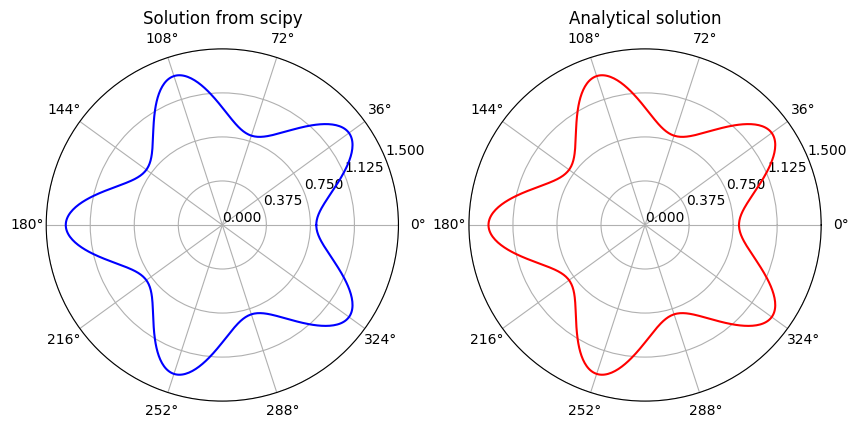

In [5]:
fig=plt.figure(figsize=(10,10))
ax=fig.subplots(1, 2, subplot_kw={"projection": "polar"})                                   ## Adding polar subplots
angles, radii=np.arange(0.,360.,180/k), np.linspace(0., R+2.*a, 5)                          ## To correctly display the values on the grid

for i in ax:                                                                                ## Iterate to set the correct labels and grids
    i.set_rgrids(radii)
    i.set_rlim(bottom=0.0, top=R+2.*a)
    i.set_thetagrids(angles)

## Plot of the solution from odeint
ax[0].plot(theta, pos, color="blue")
ax[0].set_title("Solution from scipy");
extent=ax[0].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.savefig("Scipy_solution.png", bbox_inches=extent.expanded(1.2, 1/1.6), dpi=500)

## Plot of the solution found by hand
ax[1].plot(theta, 1/(R+a*np.cos(k*theta+phi)), color="red")
ax[1].set_title("Analytical solution");
extent=ax[1].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.savefig("Analitical_solution.png", bbox_inches=extent.expanded(1.2, 1.4), dpi=500)